4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5017 - acc: 0.8238 - val_loss: 0.4200 - val_acc: 0.8494
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3765 - acc: 0.8647 - val_loss: 0.3875 - val_acc: 0.8597
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3364 - acc: 0.8782 - val_loss: 0.3601 - val_acc: 0.8699


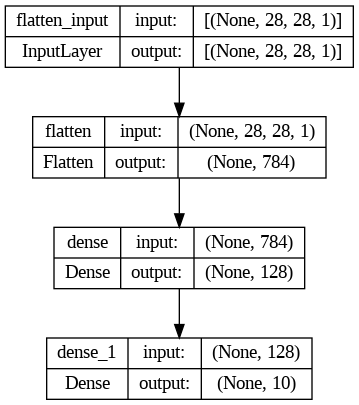

In [1]:
import tensorflow as tf 
import numpy as np

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape( (trainX.shape[0], 28,28,1) )
testX = testX.reshape( (testX.shape[0], 28,28,1) )

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)